## **Trabalho de Machine Learning**
**Professora:** Ananda Freire

**Aluno:** Vinicius Cordeiro Nunes - 2030070

> Importação das bibliotecas

---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

> Importação da base de dados

----

In [ ]:
data = pd.read_csv('Iris.csv')

In [ ]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


> Visualização dos dados de estudo

-----

Gráfico 1 - Altura das pétalas


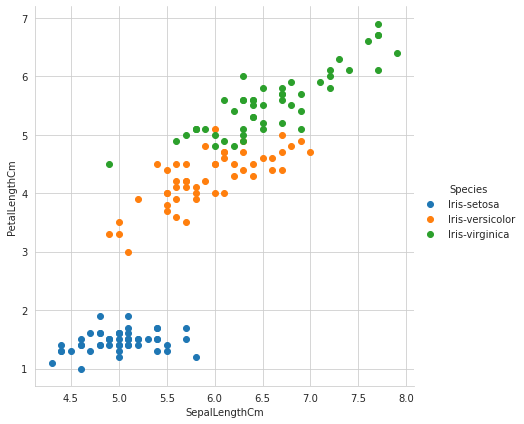

In [ ]:
sns.set_style("whitegrid")

print("Gráfico 1 - Altura das pétalas")

sns.FacetGrid(data, hue ="Species",
              height = 6).map(plt.scatter,
                              'SepalLengthCm',
                              'PetalLengthCm').add_legend()

Gráficos 2 - Largura das pétalas


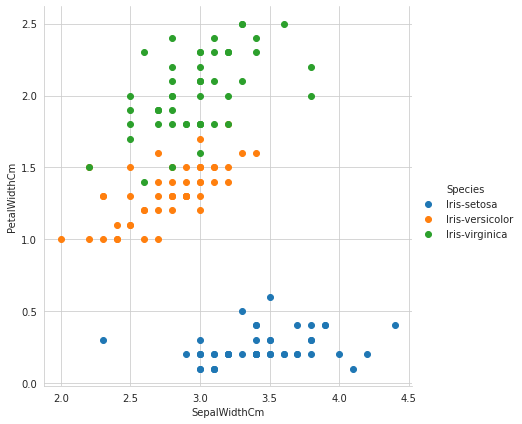

In [ ]:
print("Gráficos 2 - Largura das pétalas")
sns.FacetGrid(data, hue ="Species",
              height = 6).map(plt.scatter,
                              'SepalWidthCm',
                              'PetalWidthCm').add_legend()

# Escolha do Modelo de Avaliação

De acordo com os gráficos acima, podemos identificar que as classes classificadas estão seguimentadas/clusterizadas.

Uma vez visualidados os distanciamentos entre as classes da base de dados, precisamos garantir que em qualquer amostra de treinamento exista pelo menos um registro/tupla de todas as classes. Para isso, utilizaremos o **Modelo de Avaliação: VALIDAÇÃO CRUZADA**.

# Escolha das Métricas de Classificação

Agora, vamos testar as Métricas de Classificação para selecionar a que melhor se adequa aos dados de estudo.

> Importando base dados Iris do sklearn e instanciando as labels e os dados.

----

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()

X_data = iris.data
y_labels = iris.target

> Vamos utilzar alguns Modelos constantes no pacote Naive Bayes para as predições dentro das métricas.

----

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import ComplementNB

from sklearn import datasets
from sklearn.metrics import accuracy_score,confusion_matrix, plot_confusion_matrix,recall_score,precision_score
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import train_test_split

## Testes com o Modelo de Avaliação escolhido: Validação Cruzada

> Métricas de Classificação que testaremos em nosso estudo

----


In [ ]:
scoring = ['accuracy', 'balanced_accuracy','f1_macro','precision_macro','recall_macro']

> Método para facilitação de reuso

----

In [ ]:
def test_model(model):
  return cross_validate(model,X_data,y_labels,scoring=scoring,cv=3)

> Teste com algoritmo ComplementNB - CNB

----

In [ ]:
test_model(ComplementNB())

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'fit_time': array([0.00137758, 0.00187039, 0.00082302]),
 'score_time': array([0.0056479 , 0.00440335, 0.00297475]),
 'test_accuracy': array([0.66, 0.68, 0.66]),
 'test_balanced_accuracy': array([0.66666667, 0.66666667, 0.66666667]),
 'test_f1_macro': array([0.55102041, 0.55510204, 0.55555556]),
 'test_precision_macro': array([0.49494949, 0.49189815, 0.5       ]),
 'test_recall_macro': array([0.66666667, 0.66666667, 0.66666667])}

> Teste com algoritmo CategoricalNB

----

In [ ]:
test_model(CategoricalNB())

{'fit_time': array([0.00397325, 0.00171208, 0.00264287]),
 'score_time': array([0.00707221, 0.00308275, 0.00281525]),
 'test_accuracy': array([0.94, 0.9 , 0.96]),
 'test_balanced_accuracy': array([0.93872549, 0.90073529, 0.96078431]),
 'test_f1_macro': array([0.93917051, 0.89861751, 0.96078431]),
 'test_precision_macro': array([0.94074074, 0.90601504, 0.96078431]),
 'test_recall_macro': array([0.93872549, 0.90073529, 0.96078431])}

> Teste com algoritmo MultinomialNB

----

In [ ]:
test_model(MultinomialNB())

{'fit_time': array([0.00182056, 0.00083494, 0.00076652]),
 'score_time': array([0.00445819, 0.00251937, 0.00241375]),
 'test_accuracy': array([0.96, 0.92, 0.96]),
 'test_balanced_accuracy': array([0.96078431, 0.92156863, 0.96078431]),
 'test_f1_macro': array([0.95955882, 0.91851852, 0.96078431]),
 'test_precision_macro': array([0.96296296, 0.93333333, 0.96078431]),
 'test_recall_macro': array([0.96078431, 0.92156863, 0.96078431])}

> Teste com algoritmo GaussianNB

----

In [ ]:
test_model(GaussianNB())

{'fit_time': array([0.00086427, 0.00063396, 0.00059628]),
 'score_time': array([0.00444436, 0.00261641, 0.00271511]),
 'test_accuracy': array([0.92, 0.94, 0.96]),
 'test_balanced_accuracy': array([0.92034314, 0.93872549, 0.96078431]),
 'test_f1_macro': array([0.91911765, 0.93917051, 0.96064815]),
 'test_precision_macro': array([0.92222222, 0.94074074, 0.96491228]),
 'test_recall_macro': array([0.92034314, 0.93872549, 0.96078431])}

De acordo com os testes, podemos constatar que as Métricas **Acurácia** e **Recall** são as mais próximas do acerto.
Pois em todos os modelos elas se destacaram, mostrando que podem validar a predições de maneira otimizada.

# **RESULTADO**

## Modelos de Avaliação: **Validação Cruzada**
## Métricas de Classificação: **Acurácia** e **Recall**
## Modelo/Algoritmo Naive Bayes: **MultinomialNB**